In [1]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API/')

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

In [4]:
from IdealMetadataInterface import IdealMetadataInterface

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [6]:
import plotly.graph_objects as go


In [7]:
import datetime

In [20]:
from govuk_bank_holidays.bank_holidays import BankHolidays


In [8]:
pd.set_option('display.max_columns', None)

In [36]:
def df_appliance_daily(homeid):
    folder_path_appliances = '/Users/barry/CodeAcademy/Ideal_dataset/room_and_appliance_sensors/sensordata'
    ideal_appliances = IdealDataInterface(folder_path_appliances)
    view_df = ideal_appliances.view(homeid = homeid) #will allow us to get the sensorids
    df = pd.DataFrame() #creat an empty dataframe to store the electric info
    sensor_list = list(view_df[view_df.category == 'electric-appliance'].sensorid) #appliance sensor id's for the provided house
    if len(sensor_list) > 0: #DF only gets populated if there are monitored appliances
        electrics_appliance_info = ideal_appliances.get(sensorid = sensor_list) #appliance info as a list with extra infor
        for appliance in electrics_appliance_info: #cycle through the list importing it to the dataframe
            df[appliance['subtype']] = appliance['readings']
    else:
        print('no monitored appliances')
    try:
        df = df.resample('1D').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df = df.fillna(0) # get rid of the NaN values
    except:
        pass
    return df



In [37]:
df_appliance_daily(106)

Found entries for 4824 sensor readings.


,kettle,microwave,fridgefreezer,washingmachine
time,,,,
2017-05-17,246,0.0,0.0,0.0
2017-05-18,5917,0.0,0.0,0.0
2017-05-19,3073,0.0,0.0,0.0
2017-05-20,14888,0.0,0.0,0.0
2017-05-21,3009,0.0,0.0,0.0
...,...,...,...,...
2018-06-10,2928,0.0,0.0,0.0
2018-06-11,2969,0.0,0.0,0.0
2018-06-12,0,0.0,0.0,0.0


In [38]:

def bankholidays(date):
    bankholidays = BankHolidays()
    return bankholidays.is_holiday(date)



In [49]:
def df_dwelling_daily(homeid):
    folder_path_dwelling = '/Users/barry/CodeAcademy/Ideal_dataset/sensordata'
    ideal_dwelling = IdealDataInterface(folder_path_dwelling)
    sensor_list = list(ideal_dwelling.view(homeid = homeid).sensorid)
    df_dwelling = pd.DataFrame() #creat an empty dataframe to store the electric info
    dwelling_info = ideal_dwelling.get(sensorid = sensor_list)
    if len(dwelling_info) > 0:
        for sensor in dwelling_info:
            df_dwelling[sensor['subtype']] = sensor['readings']
    else:
        print('no relevant dwelling sensors')
    try:
        df_dwelling = df_dwelling.resample('1D').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df_dwelling = df_dwelling.fillna(0) # get rid of the NaN values
    except:
        pass
    df_dwelling['day'] = df_dwelling.index.day_name()
    df_dwelling['date'] = df_dwelling.index.date
    df_dwelling['is_holiday'] = df_dwelling['date'].apply(bankholidays)
    df_dwelling['day'] = df_dwelling.apply(lambda row: 'holiday' if row['is_holiday'] == True else row['day'], axis=1)
    return df_dwelling
    



In [50]:
df_106 = df_dwelling_daily(106)

Found entries for 1592 sensor readings.


In [51]:
df_106[df_106['day'] == 'holiday']

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,day,date,is_holiday
time,,,,,,,,,,,,
2018-01-01,749667,723016.0,0.0,8884.0,63993.0,56.0,419029.0,91668.0,90800.0,holiday,2018-01-01,True
2018-03-30,1423087,1266349.0,447.0,107536.0,295725.0,87.0,1566802.0,146322.0,145070.0,holiday,2018-03-30,True
2018-05-07,1483604,1345768.0,1006.0,9723.0,183057.0,23.0,1006797.0,92218.0,91635.0,holiday,2018-05-07,True
2018-05-28,1418365,1216845.0,0.0,166951.0,366913.0,84.0,1472022.0,121364.0,120595.0,holiday,2018-05-28,True


In [54]:
def day_consumption(df, homeid = None):
    fig, axs = plt.subplots(figsize = (10, 5))
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'holiday']
    sns.boxplot(data = df, x = df.day, y = 'electric-combined', ax=axs, order = order)
    plt.title(f'daily consumption for home {homeid}')
    axs.get_yaxis().get_major_formatter().set_scientific(False)
    

    plt.show()

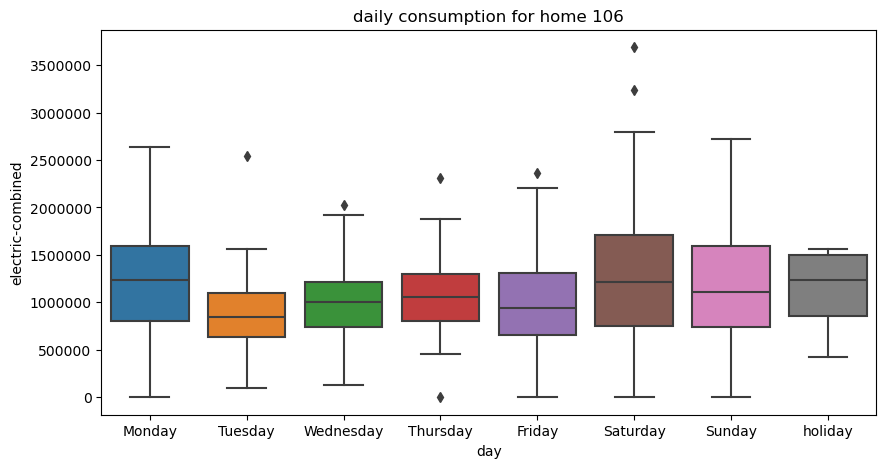

In [55]:
day_consumption(df_106, 106)